In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [59]:
df = pd.read_csv('interpolated.csv')

## Original steering angle distribution

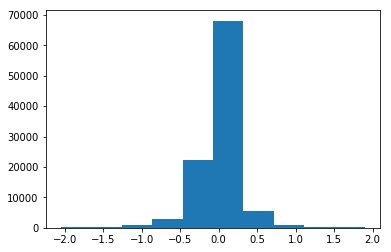

In [60]:
bins_cnt, bins,_ = plt.hist(df.angle, bins=10) 

# Dataset Utils

In [61]:
def datasetTreatment(dataframe):
    """
    Make the steering angle has uniform distribution by getting rid of
    the bins having too many samples
    
    :param dataframe:
        cotains infor of csv file
        
    :return:
        dataframe with uniform distributed steering angle
    """
    # create histogram of original dataset
    bins_cnt, bins,_ = plt.hist(dataframe.angle, bins=10)
    
    # calculate keep_prob for each bins
    bins_list = [(bins[i], bins[i + 1]) for i in range(len(bins) - 1)]
    keep_prob = []
    baseline = bins_cnt.mean()
    for cnt in bins_cnt:
        if cnt < baseline:
            keep_prob.append(1.)
        else:
            keep_prob.append(baseline / cnt)
    
    # Append 'keep' column to dataframe
    dataframe['keep'] = pd.Series(np.array([False for i in range(len(dataframe.index))]), index=dataframe.index)
    
    # Sort dataframe wrt angle
    dataframe.sort_values('angle', inplace=True)
    
    # iterate through every row and decide whether to keep this row according bins' keep_prob
    bins_idx = 0  # which bins to start testing if this angle is belong to
    for index, row in dataframe.iterrows():
        # Find bins contains this angle
        for _idx in range(bins_idx, len(bins_list)):
            if row['angle'] >= bins_list[_idx][0] and row['angle'] <= bins_list[_idx][1]:
                # Decide whether to keep this angle
                if bernoulli.rvs(keep_prob[_idx]):
                    dataframe.at[index, 'keep'] = True
                # update bins_idx
                if _idx != bins_idx:
                    bins_idx = _idx
                break  # stop finding bins for this angle & move on to next row
    
    return dataframe.loc[dataframe.keep].drop(columns='keep')


def datasetSeparateTrainValidation(dataframe):
    """
    Separate dataframe into training set (80%) and validation set (20%)
    
    :param dataframe:
    
    :return:
        training_df, validation_df
    """
    # shuffle dataframe
    dataframe = dataframe.sample(frac=1).reset_index(drop=True)
    # separate
    training_end = int(0.8 * len(dataframe))
    training_df = dataframe.iloc[: training_end, :]
    validation_df = dataframe.iloc[training_end: , :]
    
    return training_df, validation_df
    

# Uniformize Dataset

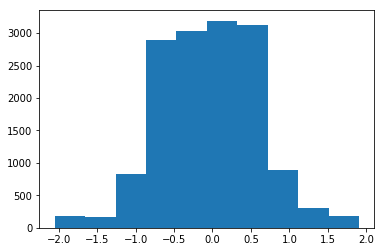

In [67]:
new_df = datasetTreatment(new_df)

(array([ 179.,  171.,  822., 1452., 1482., 1460., 1507.,  893.,  304.,
         177.]),
 array([-2.05076194, -1.65527033, -1.25977871, -0.8642871 , -0.46879549,
        -0.07330388,  0.32218773,  0.71767935,  1.11317096,  1.50866257,
         1.90415418]),
 <a list of 10 Patch objects>)

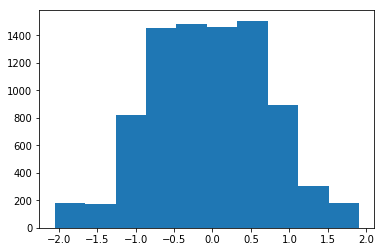

In [68]:
plt.hist(new_df.angle, bins=10)

In [69]:
len(new_df)

8447

# Get training & validation dataset

In [70]:
training_df, validation_df = datasetSeparateTrainValidation(new_df)

In [71]:
# Export to csv
training_df.to_csv('ch2_training.csv')
validation_df.to_csv('ch2_validation.csv')

# Test distribution of 2 datasets

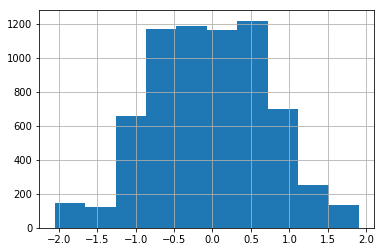

In [73]:
test_df = pd.read_csv('ch2_training.csv')
test_df.angle.hist()

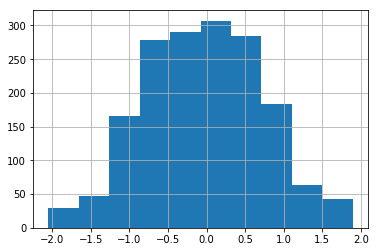

In [74]:
test_df = pd.read_csv('ch2_validation.csv')
test_df.angle.hist()